In [1]:
# Purpose of the code:
    # Find the correlation between rate of change of feature values and MSFC scores in visits 2 & 3

In [2]:
# necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
from scipy import stats
%matplotlib inline

In [3]:
# change to a proper directory to access the data
pwd

'/camhpc/home/nhassanp/jupyter-notebook-dir'

In [4]:
cd /camdatalake/bronze/verily_ms/device/

/camdatalake/bronze/verily_ms/device


In [5]:
pwd

'/camdatalake/bronze/verily_ms/device'

In [6]:
# check the content of the directory
ls

FeaturesDay.csv.gz                     tree_10.dot  tree_26.dot  tree_41.dot
FeaturesStudy.csv.gz                   tree_11.dot  tree_27.dot  tree_42.dot
FeatureStudy_at_home_related           tree_12.dot  tree_28.dot  tree_43.dot
FeatureStudy_clinical_1_related        tree_13.dot  tree_29.dot  tree_44.dot
FeatureStudy_clinical_2_related        tree_14.dot  tree_2.dot   tree_45.dot
FeatureStudy_clinical_3_related        tree_15.dot  tree_30.dot  tree_46.dot
FeatureStudy_clinical_related          tree_16.dot  tree_31.dot  tree_47.dot
FeatureStudy_demographics_related      tree_17.dot  tree_32.dot  tree_48.dot
FeatureStudy_free_living_related       tree_18.dot  tree_33.dot  tree_49.dot
FeatureStudy_model_related             tree_19.dot  tree_34.dot  tree_4.dot
FeatureStudy_MSFC_composite_related    tree_1.dot   tree_35.dot  tree_50.dot
FeatureStudy_MSFC_related              tree_20.dot  tree_36.dot  tree_5.dot
FeatureStudy_patient_info_related      tree_21.dot  tree_37.dot  tree_6.dot
GM

In [7]:
# download and read the data

# FeatureDay: Average value of the features for each day of study. Days are listed as 
# DayOfStudy

# FeatureStudy: Features for the entire study period.For the at home features, 
# the reported value is the median of the observed day level values.

import gzip, csv
with gzip.open("FeaturesDay.csv.gz", "rt", newline="") as file:
    FeatureDay = pd.read_csv(file, header = 0)

with gzip.open("FeaturesStudy.csv.gz", "rt", newline="") as file:
    FeatureStudy = pd.read_csv(file, header = 0)

In [8]:
# explore the dataset
FeatureDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Columns: 217 entries, user_email to demographic_model_error_3
dtypes: float64(212), int64(3), object(2)
memory usage: 2.5+ MB


In [9]:
FeatureDay.describe()

/opt/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,msfc_walk_composite_1,msfc_9hpt_composite_1,msfc_sdmt_composite_1,msfc_snellen_composite_1,msfc_composite_1,msfc_walk_composite_residual_1,msfc_9hpt_composite_residual_1,msfc_sdmt_composite_residual_1,msfc_snellen_composite_residual_1,msfc_walk_composite_2,...,hourly_temp_median_at_home,hourly_temp_std_at_home,hourly_temp_range_at_home,hourly_amb_temp_median_at_home,hourly_amb_temp_std_at_home,hourly_amb_temp_range_at_home,prv_sdnn,demographic_model_error_1,demographic_model_error_2,demographic_model_error_3
count,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1530.000000,...,1285.000000,1285.000000,1.285000e+03,1285.000000,1285.000000,1285.000000,1044.000000,1532.000000,1530.000000,1304.000000
mean,-0.019921,0.090237,0.144536,0.039580,0.063608,-0.080672,0.030814,0.128497,-0.036285,0.039871,...,29.650973,0.726677,1.766848e+00,25.396385,3.906939,9.583735,41.326326,0.071111,-0.000918,0.025754
std,1.003682,0.953135,0.862097,1.015171,0.763705,0.820543,0.894932,0.785066,1.075377,0.776117,...,2.929483,0.786577,1.732030e+00,2.653647,1.401338,3.322437,11.870807,0.724094,0.740245,0.799465
min,-3.221528,-1.886624,-2.159982,-2.556372,-1.373281,-3.038226,-1.545838,-1.801496,-2.351975,-2.248677,...,16.700000,0.000000,-3.552714e-15,16.185000,0.000000,0.000000,11.727158,-1.577726,-1.461933,-2.505707
25%,-0.256647,-0.645806,-0.411009,-0.416552,-0.398860,-0.201410,-0.680438,-0.321350,-0.802429,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.426405,NaN,NaN
50%,0.299268,0.104155,0.135545,0.296722,0.345561,0.038386,0.180416,0.138712,-0.257036,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277935,NaN,NaN
75%,0.669878,0.940655,0.900721,1.295305,0.642663,0.301486,0.790244,0.656998,0.807599,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741979,NaN,NaN
max,0.924672,1.897517,1.939174,1.295305,1.137124,1.463065,1.543403,2.247295,1.817092,0.924672,...,33.600000,6.860394,1.470500e+01,32.740000,7.682660,18.409500,114.271105,1.117692,0.987118,1.151321


In [10]:
FeatureDay.head()

,user_email,gls_subject_code,msfc_walk_composite_1,msfc_9hpt_composite_1,msfc_sdmt_composite_1,msfc_snellen_composite_1,msfc_composite_1,msfc_walk_composite_residual_1,msfc_9hpt_composite_residual_1,msfc_sdmt_composite_residual_1,...,hourly_temp_median_at_home,hourly_temp_std_at_home,hourly_temp_range_at_home,hourly_amb_temp_median_at_home,hourly_amb_temp_std_at_home,hourly_amb_temp_range_at_home,prv_sdnn,demographic_model_error_1,demographic_model_error_2,demographic_model_error_3
0,gmssm001@glsstudykit.com,H800001,-0.187158,-1.886624,-1.285495,-1.486462,-1.211435,1.035492,-1.545838,0.138712,...,32.70,0.760989,1.905,30.7575,4.330252,11.7550,26.824533,-0.924262,-1.03338,-1.525646
1,gmssm001@glsstudykit.com,H800001,-0.187158,-1.886624,-1.285495,-1.486462,-1.211435,1.035492,-1.545838,0.138712,...,32.85,0.532629,1.350,29.5875,6.815948,15.8120,24.795007,-0.924262,-1.03338,-1.525646
2,gmssm001@glsstudykit.com,H800001,-0.187158,-1.886624,-1.285495,-1.486462,-1.211435,1.035492,-1.545838,0.138712,...,31.60,0.717705,1.800,30.2200,3.545528,7.3300,28.387662,-0.924262,-1.03338,-1.525646
3,gmssm001@glsstudykit.com,H800001,-0.187158,-1.886624,-1.285495,-1.486462,-1.211435,1.035492,-1.545838,0.138712,...,30.75,1.689474,5.550,27.3600,4.984148,13.5820,31.598062,-0.924262,-1.03338,-1.525646
4,gmssm001@glsstudykit.com,H800001,-0.187158,-1.886624,-1.285495,-1.486462,-1.211435,1.035492,-1.545838,0.138712,...,30.65,0.830880,2.205,30.6825,4.699070,13.8555,23.523694,-0.924262,-1.03338,-1.525646


In [11]:
# extract name of features in the dataset
list(FeatureDay.columns)

['user_email',
 'gls_subject_code',
 'msfc_walk_composite_1',
 'msfc_9hpt_composite_1',
 'msfc_sdmt_composite_1',
 'msfc_snellen_composite_1',
 'msfc_composite_1',
 'msfc_walk_composite_residual_1',
 'msfc_9hpt_composite_residual_1',
 'msfc_sdmt_composite_residual_1',
 'msfc_snellen_composite_residual_1',
 'msfc_walk_composite_2',
 'msfc_9hpt_composite_2',
 'msfc_sdmt_composite_2',
 'msfc_snellen_composite_2',
 'msfc_composite_2',
 'msfc_walk_composite_residual_2',
 'msfc_9hpt_composite_residual_2',
 'msfc_sdmt_composite_residual_2',
 'msfc_snellen_composite_residual_2',
 'msfc_walk_composite_3',
 'msfc_9hpt_composite_3',
 'msfc_sdmt_composite_3',
 'msfc_snellen_composite_3',
 'msfc_composite_3',
 'msfc_walk_composite_residual_3',
 'msfc_9hpt_composite_residual_3',
 'msfc_sdmt_composite_residual_3',
 'msfc_snellen_composite_residual_3',
 'sex',
 'height_inch',
 'weight_lbs',
 'bmi',
 'age_years',
 'dayofstudy',
 'movement_rate',
 'duration_movement_count',
 'stance',
 'swing',
 'turn_a

In [12]:
# found list of unique IDs for patients
patient_IDs = list(FeatureDay['gls_subject_code'].unique())
patient_IDs

['H800001',
 'H800002',
 'H800003',
 'H800004',
 'H800006',
 'H800007',
 'H800008',
 'H800009',
 'H800010',
 'H800011',
 'H800013',
 'H800014',
 'H800016',
 'H800017',
 'H800018',
 'H800019',
 'H800020',
 'H800021',
 'H800022',
 'H800023',
 'H800024',
 'H800025',
 'H800005',
 'H800012',
 'H800015']

In [13]:
# 10 free living feature with high correlation

free_living_features_highly_correlated = ['idle_minutes',
 'turn_vel_std_ankle',
 'swing',
 'stance',
 'duration_movement_count',
 'turn_vel_max_ankle',
 'turn_duration_ankle',
 'duration_rem_count',
 'rem_percent',
 'movement_rate']

In [14]:
# 19 highly correlated at home features (strutured activity)

at_home_features_highly_correlated = ['mean_pvt_delay_7_at_home',
 'mobility_stance_at_home',
 'mean_pvt_delay_at_home',
 'pq_nondominant_rhythm_at_home',
 'pq_nondominant_median_at_home',
 'pq_dominant_rhythm_at_home',
 'turn_vel_max_at_home',
 'mobility_swing_at_home',
 'zx_dominant_num_correct_at_home',
 'turn_vel_std_at_home',
 'turn_duration_ankle_at_home',
 'turn_vel_max_ankle_at_home',
 'mean_pvt_delay_5_at_home',
 'zx_nondominant_median_at_home',
 'zx_nondominant_num_correct_at_home',
 'mean_pvt_delay_3_at_home',
 'turn_vel_std_ankle_at_home',
 'mobility_activity_at_home_time',
 'mean_pvt_delay_1_at_home']

In [15]:
# features related to MSFC scores (all components and composite scores)
FeaturesDay_columns_MSFC_col_names = ['msfc_walk_composite_1',
 'msfc_9hpt_composite_1',
 'msfc_sdmt_composite_1',
 'msfc_snellen_composite_1',
 'msfc_composite_1',
 'msfc_walk_composite_2',
 'msfc_9hpt_composite_2',
 'msfc_sdmt_composite_2',
 'msfc_snellen_composite_2',
 'msfc_composite_2',
 'msfc_walk_composite_3',
 'msfc_9hpt_composite_3',
 'msfc_sdmt_composite_3',
 'msfc_snellen_composite_3',
 'msfc_composite_3']

In [16]:
# features related to MSFC composite scores
FeaturesDay_columns_MSFC_composite_col_names = ['msfc_composite_1', 'msfc_composite_2', 'msfc_composite_3']

In [17]:
# breaking down FeatureDay dataframe
FeatureDay_free_living = FeatureDay[free_living_features_highly_correlated]
FeatureDay_at_home = FeatureDay[at_home_features_highly_correlated]
FeaFeatureDay_MSFC_score_all = FeatureDay[FeaturesDay_columns_MSFC_col_names]
FeaFeatureDay_MSFC_score_composite = FeatureDay[FeaturesDay_columns_MSFC_composite_col_names]

In [18]:
# create a data frame with patient IDs, all MSFC component scores for visits 2 and 3
patient_ID = []
msfc_composite_2 = []
msfc_composite_3 = []
msfc_walk_composite_2 = []
msfc_walk_composite_3 = []
msfc_9hpt_composite_2 = []
msfc_9hpt_composite_3 = []
msfc_sdmt_composite_2 = [] 
msfc_sdmt_composite_3 = []
msfc_snellen_composite_2 = []
msfc_snellen_composite_3 = []

for idx in range(len(patient_IDs)):
    ID = patient_IDs[idx]
    df = FeatureDay[FeatureDay['gls_subject_code'] == ID][['msfc_walk_composite_2',
 'msfc_9hpt_composite_2',
 'msfc_sdmt_composite_2',
 'msfc_snellen_composite_2',
 'msfc_composite_2',
 'msfc_walk_composite_3',
 'msfc_9hpt_composite_3',
 'msfc_sdmt_composite_3',
 'msfc_snellen_composite_3',
 'msfc_composite_3']]
    
    patient_ID.append(ID)
    msfc_composite_2.append(df.iloc[0]['msfc_composite_2'])
    msfc_composite_3.append(df.iloc[0]['msfc_composite_3'])
    msfc_walk_composite_2.append(df.iloc[0]['msfc_walk_composite_2'])
    msfc_walk_composite_3.append(df.iloc[0]['msfc_walk_composite_3'])
    msfc_9hpt_composite_2.append(df.iloc[0]['msfc_9hpt_composite_2'])
    msfc_9hpt_composite_3.append(df.iloc[0]['msfc_9hpt_composite_3'])
    msfc_sdmt_composite_2.append(df.iloc[0]['msfc_sdmt_composite_2'])
    msfc_sdmt_composite_3.append(df.iloc[0]['msfc_sdmt_composite_3'])
    msfc_snellen_composite_2.append(df.iloc[0]['msfc_snellen_composite_2'])
    msfc_snellen_composite_3.append(df.iloc[0]['msfc_snellen_composite_3'])
    
all_data = []
all_data.append(patient_ID)
all_data.append(msfc_composite_2)
all_data.append(msfc_composite_3)
all_data.append(msfc_walk_composite_2)
all_data.append(msfc_walk_composite_3)
all_data.append(msfc_9hpt_composite_2)
all_data.append(msfc_9hpt_composite_3)
all_data.append(msfc_sdmt_composite_2)
all_data.append(msfc_sdmt_composite_3)
all_data.append(msfc_snellen_composite_2)
all_data.append(msfc_snellen_composite_3)
all_data = list(zip(*all_data))

cols = ['patient_ID',
 'msfc_composite_2',
 'msfc_composite_3',
 'msfc_walk_composite_2',
 'msfc_walk_composite_3',
 'msfc_9hpt_composite_2',
 'msfc_9hpt_composite_3',
 'msfc_sdmt_composite_2',
 'msfc_sdmt_composite_3',
 'msfc_snellen_composite_2','msfc_snellen_composite_3']
df_MSFC_all = pd.DataFrame(all_data, columns=cols)
df_MSFC_all.head()

,patient_ID,msfc_composite_2,msfc_composite_3,msfc_walk_composite_2,msfc_walk_composite_3,msfc_9hpt_composite_2,msfc_9hpt_composite_3,msfc_sdmt_composite_2,msfc_sdmt_composite_3,msfc_snellen_composite_2,msfc_snellen_composite_3
0,H800001,-1.385647,-1.407630,-0.488279,-0.349300,-1.899765,-2.181329,-1.668083,-1.613428,-1.486462,-1.486462
1,H800002,1.109154,0.631568,0.924672,0.855183,1.261261,0.582956,0.955377,0.791410,1.295305,0.296722
2,H800003,0.932657,0.911542,0.693041,0.808856,0.896217,1.078528,0.846066,0.463478,1.295305,1.295305
3,H800004,-0.983236,-0.695738,-0.279811,-0.163995,-0.717212,-0.510256,-1.449462,-1.121529,-1.486462,-0.987171
4,H800006,0.568276,0.495086,0.669878,0.693041,0.569751,1.019000,0.736755,-0.028421,0.296722,0.296722


In [19]:
def remove_outliers(feature_values, day_of_study):
    # a function to remove outliers from input dataset and return filtered dataset as the ouput
    m = 2 # distance threshold from the mean
    mean = feature_values.mean()
    std = feature_values.std()
    tuples = list(zip(feature_values,day_of_study))
    filtered_values = []
    for (x,y) in tuples:
        if (x >= mean - m * std) & (x <= mean + m * std):
            filtered_values.append((x,y))
    unzip_filtered_values = list(zip(*filtered_values))
    # check for missing values
    if len(unzip_filtered_values) > 0:
        return pd.Series(list(unzip_filtered_values[0])), pd.Series(list(unzip_filtered_values[1]))
    else:
        return pd.Series([]),day_of_study

In [20]:
def standardize_axis(feature):
    # a function to standardize the axis
        # remove outliers (both feature values & associated days of study), return filtered values
        # use the filtered values to assign a range to axis
        # we assume dataframes FeatureDay and patient_IDs are already defined
    All_filtered_feature_values = []
    All_filtered_days_of_studies = []
    # loop on all the patients
    for ID in patient_IDs:
        # extract part of FeatureDay that is related to a patient and input feature as a new dataframe
        col_1 = feature
        col_2 = 'dayofstudy'
        df = FeatureDay[FeatureDay['gls_subject_code'] == ID][[col_1,col_2]]
        # sort the dataframe based on days of study
        df.sort(col_2, inplace = True)
        # create list of x: days of study, y: feature values
        x = df[col_2]
        y = df[col_1]
        # remove outliers (both feature values & associated days of study)
        y,x = remove_outliers(y,x)
        # store all the filtered values
        All_filtered_feature_values = All_filtered_feature_values + (pd.Series.tolist(y))
        All_filtered_days_of_studies = All_filtered_days_of_studies + (pd.Series.tolist(x))
    # set the axis ranges to the max value in the list of filtered values
    max_y = (np.max(All_filtered_feature_values))
    max_x = (np.max(All_filtered_days_of_studies))
    # return the ranges extracted for axis
    return max_y,max_x

In [21]:
def regLine_slope(feature):
    # calculate the slope of a regline that can be fit to measurments for a feature
    print(feature)
    slopes = []
    # loop on all patients
    for idx in range(len(patient_IDs)):
            # extract part of FeatureDay related to the input feature and associated days of study
            ID = patient_IDs[idx]
            col_1 = feature
            col_2 = 'dayofstudy'
            df = FeatureDay[FeatureDay['gls_subject_code'] == ID][[col_1,col_2]]
            # sort based on days of study
            df.sort(col_2, inplace = True)
            x = df[col_2]
            y = df[col_1]
            # create regression line, return its slope
            if (len(y.unique()) == 1) & (np.isnan(y.unique()).sum() == 1):
                slopes.append(np.nan)
            else:
                y,x = remove_outliers(y,x)
                if len(y) == 0:
                    slopes.append(np.nan)
                else:
                    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
                    slopes.append(slope)
    return slopes

In [22]:
def MSFC_scores_slope(col_1,col_2):
    # get the slope of a line that can fit to MSFC scores for a patient in visits 3 and 2
    slopes = []
    for idx in range(len(patient_IDs)):
            ID = patient_IDs[idx]
            # create regression line, return the its slope
            x = [0,56]
            y = list(df_MSFC_all[df_MSFC_all['patient_ID'] == ID][[col_1,col_2]].iloc[0])
            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            slopes.append(slope)
    return slopes

In [23]:
def plot_feature_across_days_and_composite_scores(feature, MSFC_component_1, MSFC_component_2):
    # plot the measurments for a specific feature vs. days
    # plot MSFC composite scores for visits 2 and 3 on a same graph
    figs, axes = plt.subplots(nrows= 5, ncols= 5,figsize=(20,20),dpi = 200)
    print(feature)
    # plot the measurments vs. days of study
    for idx in range(len(patient_IDs)):
            # extract the patient ID
            ID = patient_IDs[idx]
            # extract two columns as a dataframe
            col_1 = feature
            col_2 = 'dayofstudy'
            df = FeatureDay[FeatureDay['gls_subject_code'] == ID][[col_1,col_2]]
            # sort the dataframe based on days
            df.sort(col_2, inplace = True)
            x = df[col_2]
            y = df[col_1]
            # set the row and column numbers based on the fact that we have 25 patients
            row = idx // 5
            col = idx % 5
            # standardize the axis
            max_y,max_x = standardize_axis(feature)
            axes[row,col].set_xlim(0, max_x)
            # MSFC scores can be negative
            axes[row,col].set_ylim(-1*max_y, max_y)
            axes[row,col].set_title(ID,y=0.9)
            axes[row,col].set_xlabel('Days of Study')
            axes[row,col].set_ylabel(feature)
            # plot the measurments vs. days
            if (len(y.unique()) == 1) & (np.isnan(y.unique()).sum() == 1):
                pass
            else:
                y,x = remove_outliers(y,x)
                if len(y) == 0:
                    pass
                else:
                    sns.regplot(x,y,ax=axes[row,col],label = 'device')
                    axes[row,col].set_xlabel('Days of Study')
                    axes[row,col].set_ylabel(feature)
            # plot MSFC scores on visits 2 & 3
            col_1_new = MSFC_component_1
            col_2_new = MSFC_component_2
            x_new = [0,max_x]
            y_new = list(df_MSFC_all[df_MSFC_all['patient_ID'] == ID][[col_1_new,col_2_new]].iloc[0])
            # MSFC scores are very small. Scale them.
            y_new = [(max_y/2) * i for i in y_new] 
            axes[row,col].plot(x_new,y_new,label='MSFC')
            axes[row,col].legend(loc = 3)

In [24]:
# create a new data frame with all the information that we want to find the correlation between them
summary_of_slopes_df = pd.DataFrame(patient_IDs,columns=['patient_IDs'])

# slope of regression lines fitted to values of free-living features
for feature in free_living_features_highly_correlated:
    slopes = regLine_slope(feature)
    summary_of_slopes_df[feature] = slopes
    
# slope of regression lines fitted to values of at home features (structured activities)   
for feature in at_home_features_highly_correlated:
    slopes = regLine_slope(feature)
    summary_of_slopes_df[feature] = slopes

# slope of regresstion lines fitted to MSFC composite scores and other components
col_1 = 'msfc_composite_2'
col_2 = 'msfc_composite_3'    
summary_of_slopes_df['msfc_composite_2_3'] = MSFC_scores_slope(col_1,col_2)
#summary_of_slopes_df['msfc_composite_diff_2_3'] = df_MSFC_all[col_2] - df_MSFC_all[col_1]

col_1 = 'msfc_walk_composite_2'
col_2 = 'msfc_walk_composite_3'    
summary_of_slopes_df['msfc_walk_composite_2_3'] = MSFC_scores_slope(col_1,col_2)
#summary_of_slopes_df['msfc_walk_composite_diff_2_3'] = df_MSFC_all[col_2] - df_MSFC_all[col_1]

col_1 = 'msfc_9hpt_composite_2'
col_2 = 'msfc_9hpt_composite_3'    
summary_of_slopes_df['msfc_9hpt_composite_2_3'] = MSFC_scores_slope(col_1,col_2)
#summary_of_slopes_df['msfc_9hpt_composite_diff_2_3'] = df_MSFC_all[col_2] - df_MSFC_all[col_1]

col_1 = 'msfc_sdmt_composite_2'
col_2 = 'msfc_sdmt_composite_3'    
summary_of_slopes_df['msfc_sdmt_composite_2_3'] = MSFC_scores_slope(col_1,col_2)
#summary_of_slopes_df['msfc_sdmt_composite_diff_2_3'] = df_MSFC_all[col_2] - df_MSFC_all[col_1]

col_1 = 'msfc_snellen_composite_2'
col_2 = 'msfc_snellen_composite_3'    
summary_of_slopes_df['msfc_snellen_composite_2_3'] = MSFC_scores_slope(col_1,col_2)
#summary_of_slopes_df['msfc_snellen_composite_diff_2_3'] = df_MSFC_all[col_2] - df_MSFC_all[col_1]

idle_minutes


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


turn_vel_std_ankle
swing
stance
duration_movement_count
turn_vel_max_ankle
turn_duration_ankle
duration_rem_count
rem_percent
movement_rate
mean_pvt_delay_7_at_home
mobility_stance_at_home
mean_pvt_delay_at_home
pq_nondominant_rhythm_at_home
pq_nondominant_median_at_home
pq_dominant_rhythm_at_home
turn_vel_max_at_home
mobility_swing_at_home
zx_dominant_num_correct_at_home
turn_vel_std_at_home
turn_duration_ankle_at_home
turn_vel_max_ankle_at_home
mean_pvt_delay_5_at_home
zx_nondominant_median_at_home
zx_nondominant_num_correct_at_home
mean_pvt_delay_3_at_home
turn_vel_std_ankle_at_home
mobility_activity_at_home_time
mean_pvt_delay_1_at_home


In [25]:
summary_of_slopes_df

,patient_IDs,idle_minutes,turn_vel_std_ankle,swing,stance,duration_movement_count,turn_vel_max_ankle,turn_duration_ankle,duration_rem_count,rem_percent,...,zx_nondominant_num_correct_at_home,mean_pvt_delay_3_at_home,turn_vel_std_ankle_at_home,mobility_activity_at_home_time,mean_pvt_delay_1_at_home,msfc_composite_2_3,msfc_walk_composite_2_3,msfc_9hpt_composite_2_3,msfc_sdmt_composite_2_3,msfc_snellen_composite_2_3
0,H800001,-0.333713,0.120676,-0.000269,-0.001239,-9.252239e+04,0.146459,-0.000557,77.683660,-0.440150,...,0.281984,-1.706491,0.097788,-3.078746,-7.100238,-0.000393,0.002482,-0.005028,0.000976,0.000000
1,H800002,-3.990323,-0.176481,0.000206,0.004288,8.785594e+06,-0.556949,-0.000431,3456.500000,-93.232335,...,NaN,-1.785865,NaN,NaN,-2.287975,-0.008528,-0.001241,-0.012113,-0.002928,-0.017832
2,H800003,1.807359,0.043801,0.000089,0.000196,-4.838493e+04,0.247608,0.000122,-48.335186,-0.812248,...,0.266949,-0.827028,-0.032276,-38.422432,-0.588907,-0.000377,0.002068,0.003256,-0.006832,0.000000
3,H800004,-1.724538,0.007296,-0.000252,-0.000324,1.083575e+04,0.078867,0.000144,13.984975,0.273447,...,0.432207,1.875152,0.019237,-21.683364,1.764560,0.005134,0.002068,0.003696,0.005856,0.008916
4,H800006,1.046516,0.282163,-0.000316,0.000085,1.939326e+04,0.449688,-0.000267,5.671045,-1.225606,...,-0.444721,2.378412,-0.081812,49.343303,2.004394,-0.001307,0.000414,0.008022,-0.013664,0.000000
5,H800007,-2.414959,0.310358,-0.000051,-0.000870,-1.779437e+05,0.152820,-0.000176,-168.536674,-3.445831,...,-2.644737,1.643903,3.703348,-386.026971,1.305963,0.003899,0.002068,0.007672,0.005856,0.000000
6,H800008,-0.878366,-0.057892,0.000014,-0.000269,-6.562635e+04,-0.048933,0.000175,-110.106902,-0.673478,...,-0.235849,2.448952,0.050157,17.752515,2.912421,0.000047,-0.002895,-0.007654,0.010736,0.000000
7,H800009,-7.860947,-2.809173,0.000900,0.005298,NaN,-2.738219,0.001905,NaN,NaN,...,-2.783784,8.654634,-1.754279,108.918919,24.936585,NaN,NaN,NaN,NaN,NaN
8,H800010,-0.199924,0.150877,-0.000179,0.000566,-8.081778e+03,0.285458,0.000053,-3.746102,1.279410,...,1.339996,-1.033949,0.171405,-41.905122,-1.276551,0.005072,0.000827,0.009273,0.000000,0.010190
9,H800011,-10.223465,-0.167327,0.000045,-0.000157,-1.837133e+04,-0.199802,0.000087,-18.382738,1.725721,...,-0.041029,-2.201298,-0.179846,-97.374116,0.503884,-0.002454,0.001241,-0.008128,-0.002928,0.000000


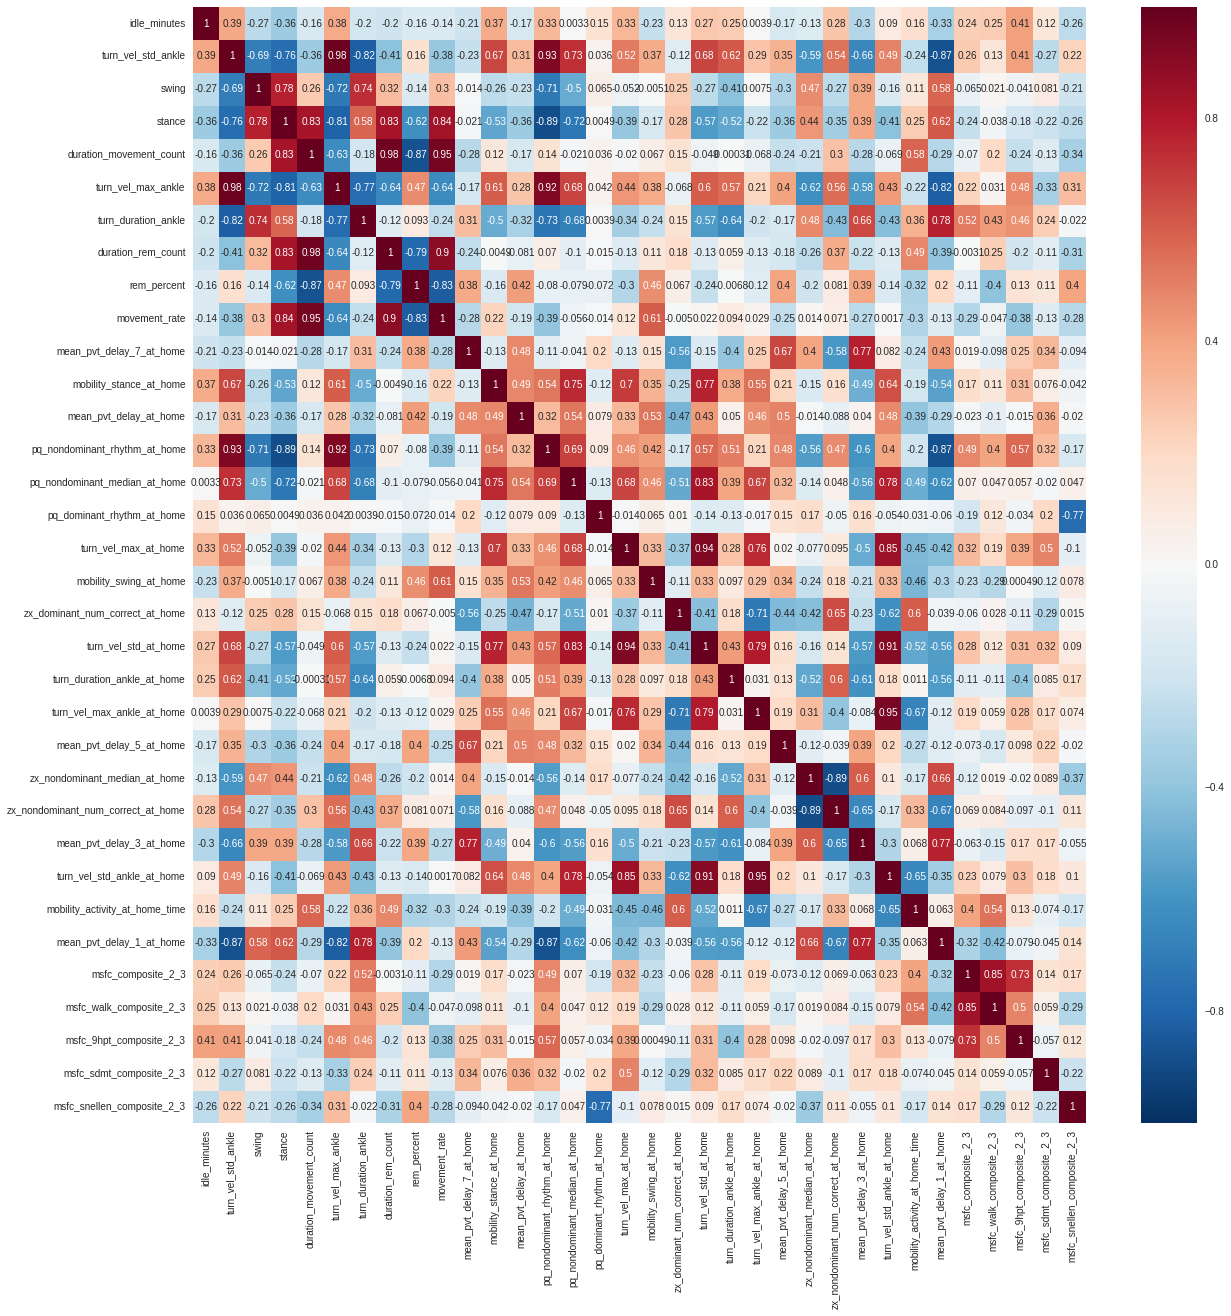

In [26]:
# what rate of changes are correlated
plt.figure(figsize=(20, 20))
sns.heatmap(summary_of_slopes_df.corr(), annot=True)

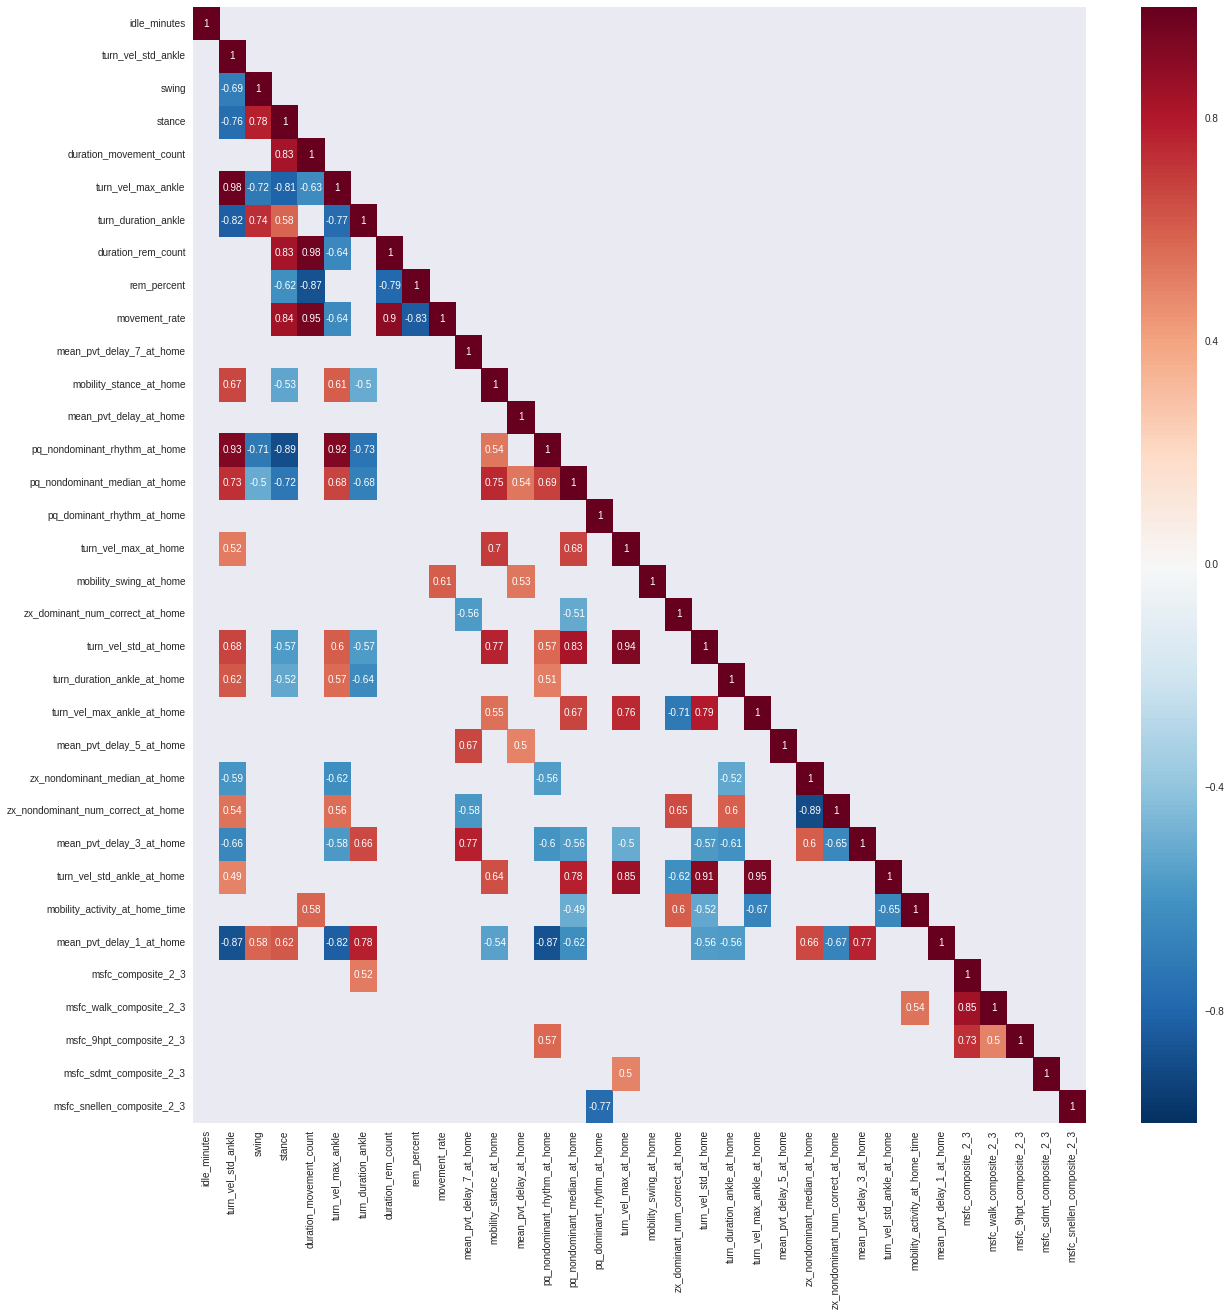

In [27]:
# make the low corelated values to mask from the heatmap
def func(x):
    if (x > -0.49) & (x < 0.49):
        return True
    else:
        return False
    
df = summary_of_slopes_df.corr()

# make a mask dataframe
mask = df.isnull()
for name in list(df.columns):
    mask[name] = df[name].apply(func)
# mask top half of the map as it is symmetrical
(row,col) = mask.shape
for i in range(row):
    for j in range(col):
        if j > i:
            mask.iloc[i][j] = True
# plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df, mask=mask, annot=True)

In [ ]:
# take a closer look to values of features which are highly correlated to MSFC component scores

turn_duration_ankle


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


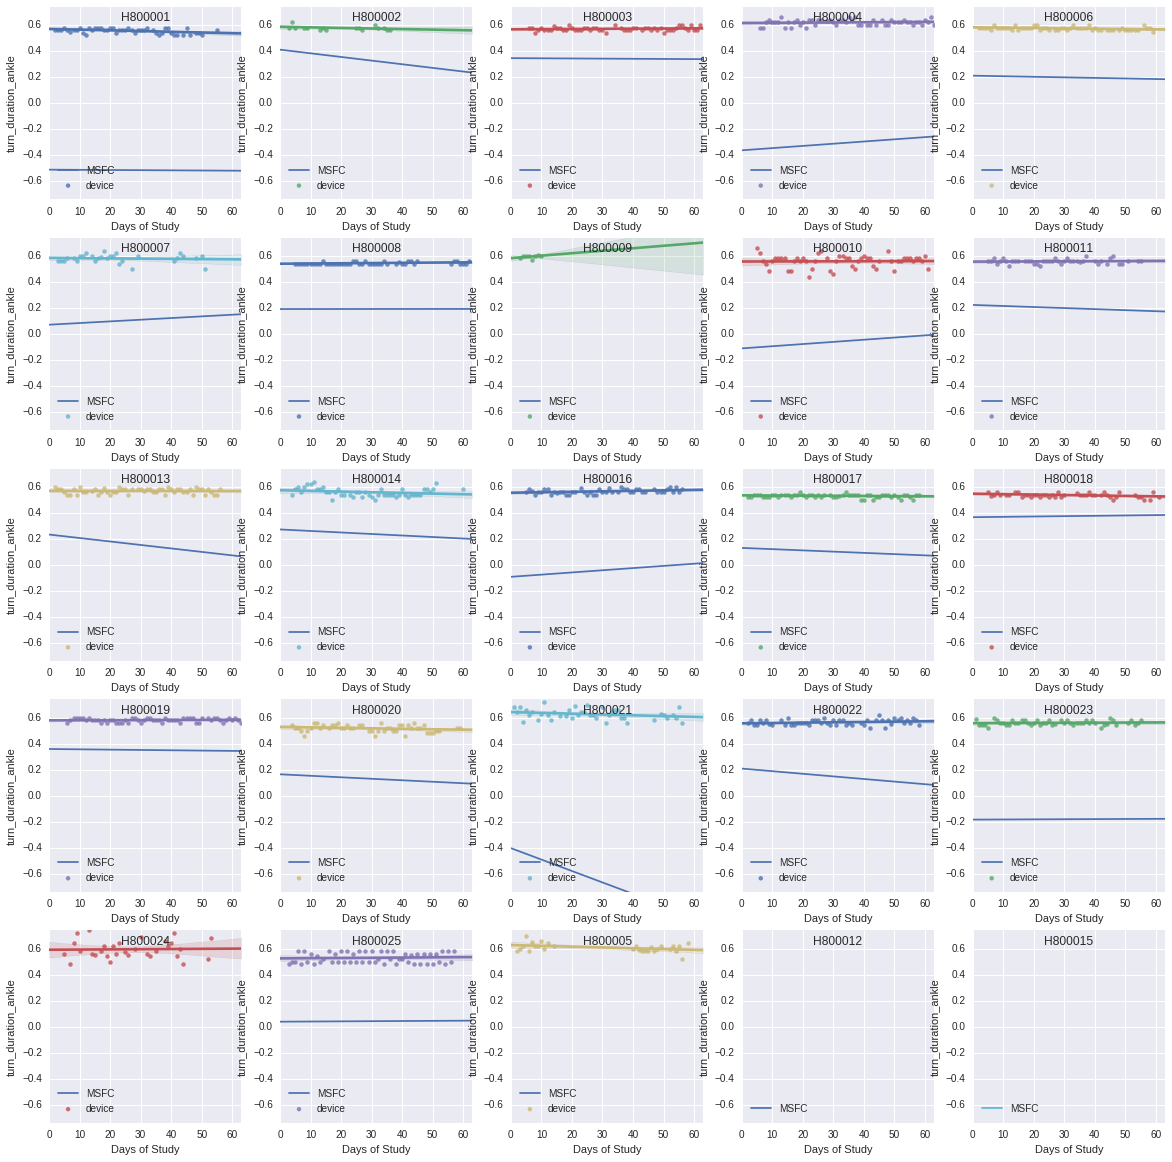

In [61]:
# turn_duration_ankle
feature = free_living_features_highly_correlated[6]
MSFC_component_1 = 'msfc_composite_2'
MSFC_component_2 = 'msfc_composite_3'
plot_feature_across_days_and_composite_scores(feature, MSFC_component_1, MSFC_component_2)

mobility_activity_at_home_time


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


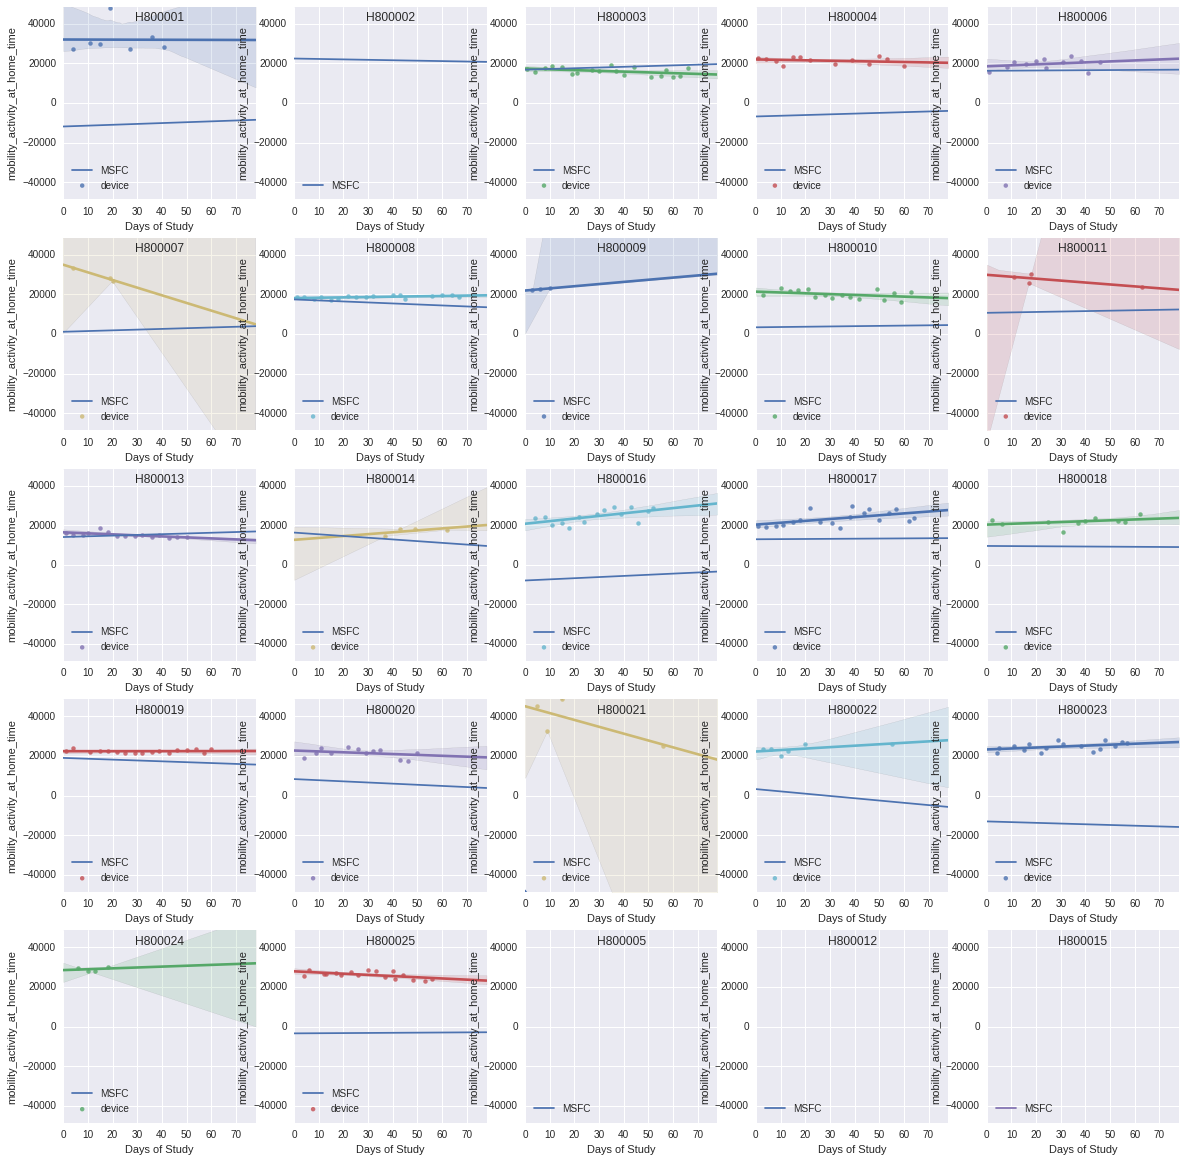

In [62]:
# mobility_activity_at_home_time
feature = at_home_features_highly_correlated[17]
MSFC_component_1 = 'msfc_walk_composite_2'
MSFC_component_2 = 'msfc_walk_composite_3'
plot_feature_across_days_and_composite_scores(feature, MSFC_component_1, MSFC_component_2)

pq_nondominant_rhythm_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


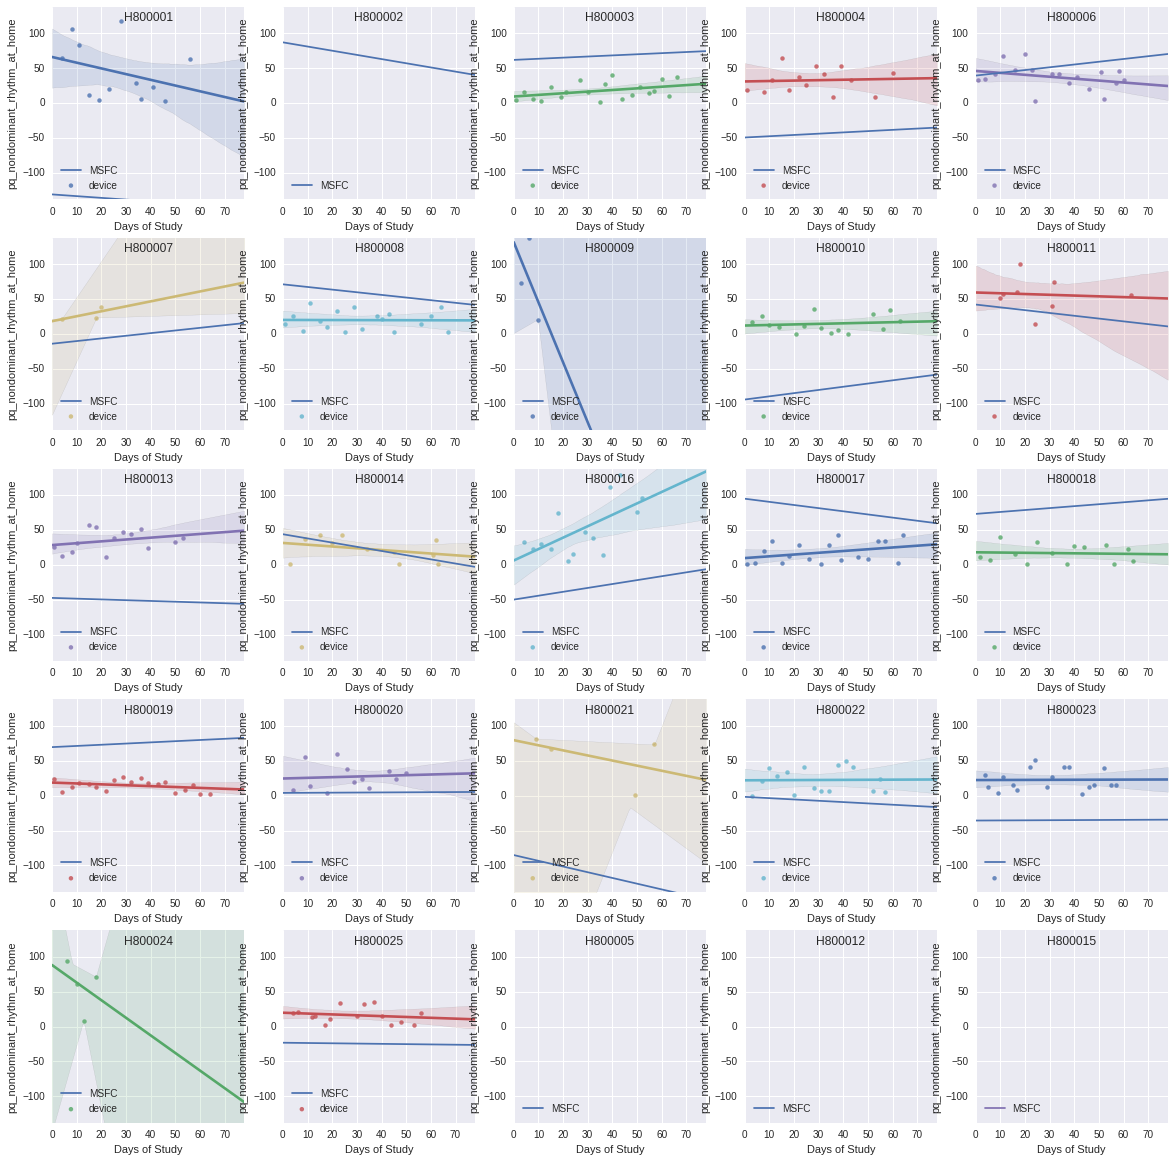

In [63]:
# pq_nondominant_rhythm_at_home
feature = at_home_features_highly_correlated[3]
MSFC_component_1 = 'msfc_9hpt_composite_2'
MSFC_component_2 = 'msfc_9hpt_composite_3'
plot_feature_across_days_and_composite_scores(feature, MSFC_component_1, MSFC_component_2)

turn_vel_max_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


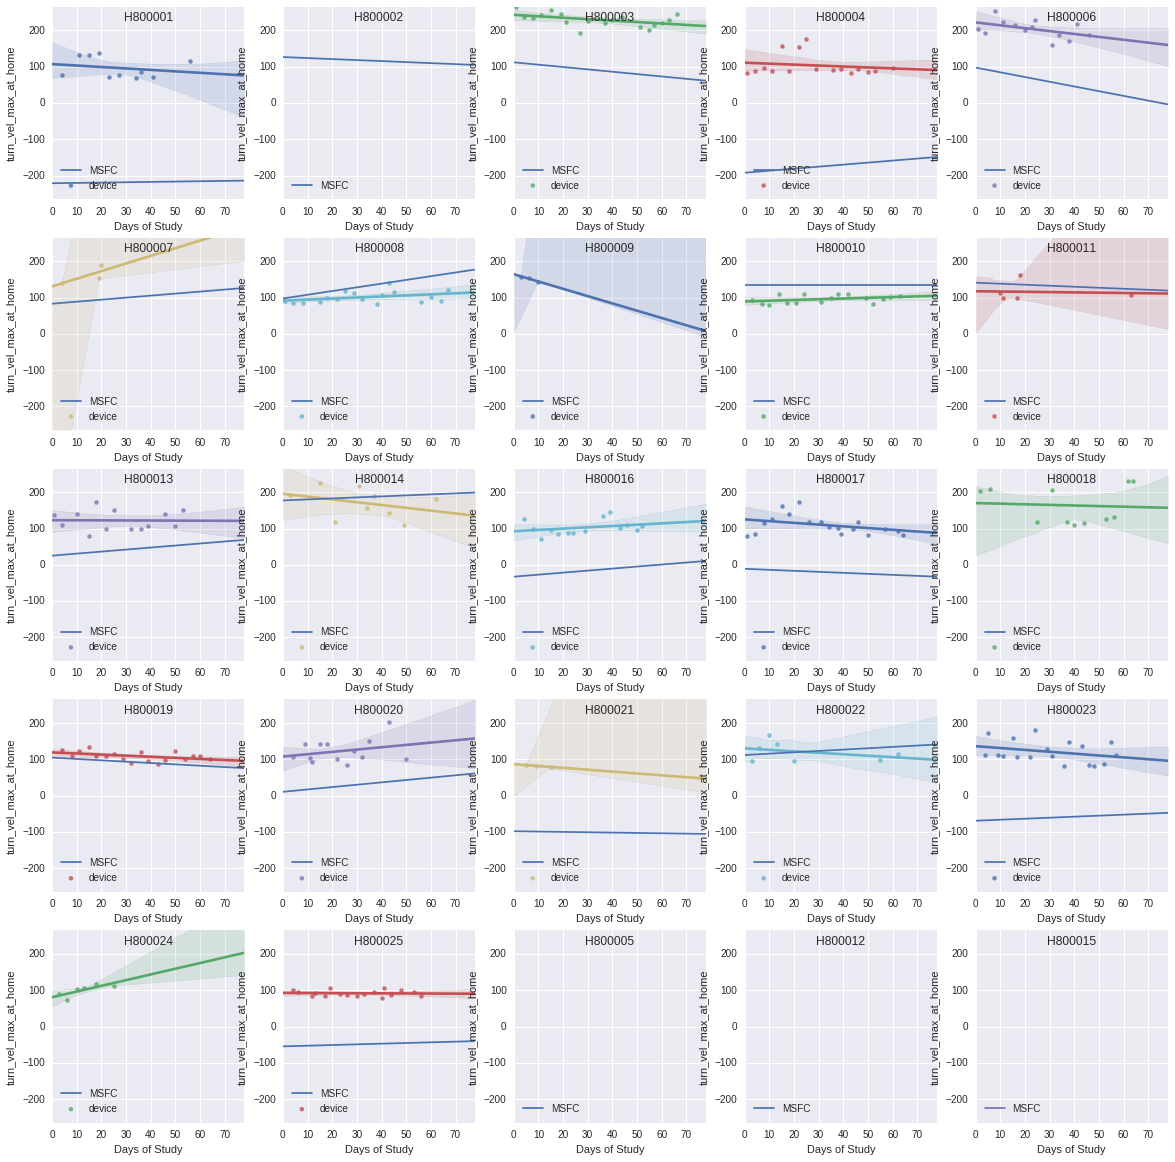

In [64]:
# turn_vel_max_at_home
feature = at_home_features_highly_correlated[6]
MSFC_component_1 = 'msfc_sdmt_composite_2'
MSFC_component_2 = 'msfc_sdmt_composite_3'
plot_feature_across_days_and_composite_scores(feature, MSFC_component_1, MSFC_component_2)

pq_dominant_rhythm_at_home


/opt/python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


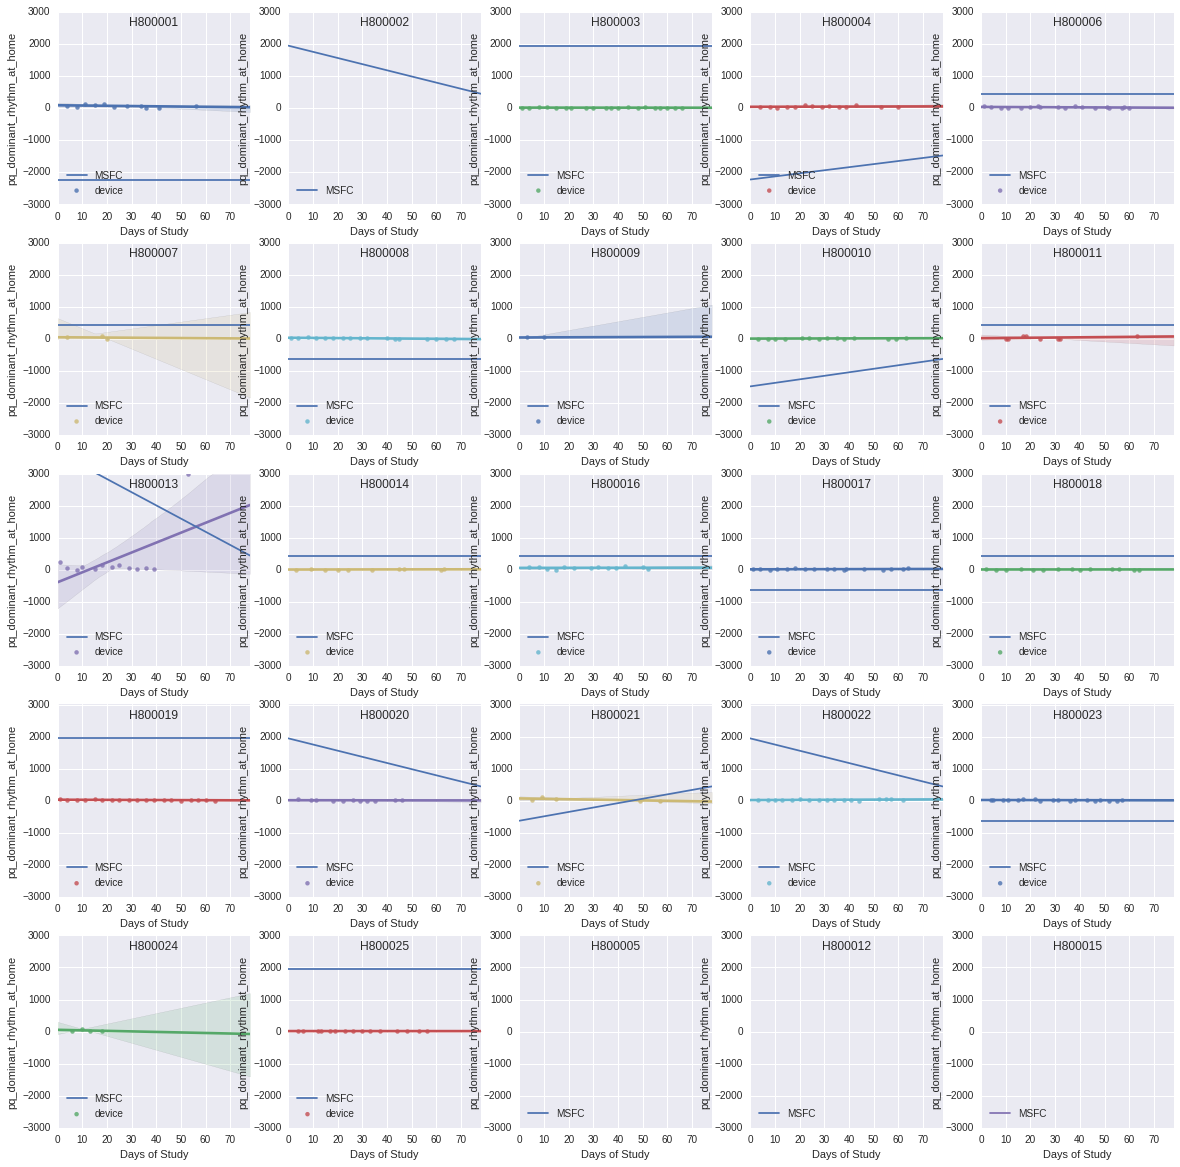

In [65]:
# pq_dominant_rhythm_at_home
feature = at_home_features_highly_correlated[5]
MSFC_component_1 = 'msfc_snellen_composite_2'
MSFC_component_2 = 'msfc_snellen_composite_3'
plot_feature_across_days_and_composite_scores(feature, MSFC_component_1, MSFC_component_2)

In [28]:
def corr_and_p_values(df):
    # a function to calculate p values along with correlation values for a dataframe
    # input: a dataframe
    # output: the correlation and p values between each pair of clolumns
    import numpy as np
    import pandas as pd
    from scipy.stats import pearsonr

    coeffmat = np.zeros((df.shape[1], df.shape[1]))
    pvalmat = np.zeros((df.shape[1], df.shape[1]))

    for i in range(df.shape[1]):    
        for j in range(df.shape[1]): 
            column1 = df.columns[i]
            column2 = df.columns[j]
            # drop all null values
            # pearsonr cannot handle null values in data(will return null for the whole)
            df_clean = df[[column1, column2]].dropna()
            df_clean.columns = [column1 + '_1', column2 + '_2']
            corrtest = pearsonr(df_clean[column1 + '_1'], df_clean[column2 + '_2'])

            coeffmat[i,j] = corrtest[0]
            pvalmat[i,j] = corrtest[1]
    # make a new dataframe with correlation and p values included
    dfcoeff = pd.DataFrame(coeffmat, columns=df.columns, index=df.columns)
    dfpvals = pd.DataFrame(pvalmat, columns=df.columns, index=df.columns)
    # return the new dataframe
    return dfcoeff, dfpvals

In [29]:
def extract_high_corr_low_p_value(dfcoeff,dfpvals,corr_th,p_th):
    # look at the p values of highly correlated features
    # input: correlation values and p values data frames, threshold for correlation and p values
    # output: highly correlated features with low p values
    feature_1 = []
    feature_2 = []
    corr_values = []
    p_values = []
    for col in list(dfcoeff.columns):
        for row in list(dfcoeff.index):
            # look for high correlation wth low p values
            if (np.abs(dfcoeff[col][row]) >= corr_th) & (dfpvals[col][row] <= p_th):
                # ignore the diagonal features and correlations not related to msfc scores
                if (row != col) & (('msfc' in row) | ('msfc' in col)):
                    corr_val = dfcoeff[col][row]
                    p_val = dfpvals[col][row]
                    feature_1.append(col)
                    feature_2.append(row)
                    corr_values.append(corr_val)
                    p_values.append(p_val)
    res = pd.DataFrame()
    res['feature_1'] = feature_1
    res['feature_2'] = feature_2
    res['corr_values'] = corr_values
    res['p_values'] = p_values
    return res

In [30]:
# look at features with high correlations and low p values
# define thresholds for pvalue and correlation value
corr_th = 0.5
p_th = 0.05

df = summary_of_slopes_df.drop('patient_IDs',axis=1)
dfcoeff, dfpvals = corr_and_p_values(df)
res = extract_high_corr_low_p_value(dfcoeff,dfpvals,corr_th,p_th)

dfcoeff.head()
dfpvals.head()
res

,feature_1,feature_2,corr_values,p_values
0,turn_duration_ankle,msfc_composite_2_3,0.519628,0.018864
1,pq_nondominant_rhythm_at_home,msfc_9hpt_composite_2_3,0.572323,0.010446
2,pq_dominant_rhythm_at_home,msfc_snellen_composite_2_3,-0.773047,0.000104
3,mobility_activity_at_home_time,msfc_walk_composite_2_3,0.539895,0.017031
4,msfc_composite_2_3,turn_duration_ankle,0.519628,0.018864
5,msfc_composite_2_3,msfc_walk_composite_2_3,0.849978,0.000002
6,msfc_composite_2_3,msfc_9hpt_composite_2_3,0.727149,0.000281
7,msfc_walk_composite_2_3,mobility_activity_at_home_time,0.539895,0.017031
8,msfc_walk_composite_2_3,msfc_composite_2_3,0.849978,0.000002
9,msfc_9hpt_composite_2_3,pq_nondominant_rhythm_at_home,0.572323,0.010446
